#  1) PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [89]:
#Data collection and description
df=pd.read_csv("D:\\forestfires.csv")

In [90]:
df1=df.copy()
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [91]:
df1.drop(["month","day"],axis=1,inplace=True)

In [92]:
df1["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [93]:
df1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [94]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


C:\Users\Vikrant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


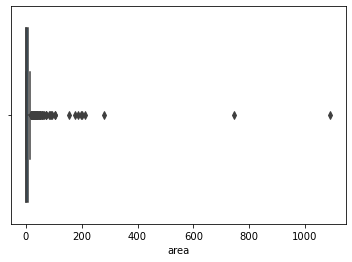

In [95]:
#outlier check
ax = sns.boxplot(df1['area'])

In [96]:
#There are 3 Outlier instances in our data

In [97]:
dfa = df1[df1.columns[0:10]]
month_colum = dfa.select_dtypes(include='object').columns.tolist()

In [98]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

<Figure size 1152x720 with 0 Axes>

In [99]:
#Majority of the fire accors in the month Aug and Sep
#For Days Sun and Fri have recoreded the most cases

In [100]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

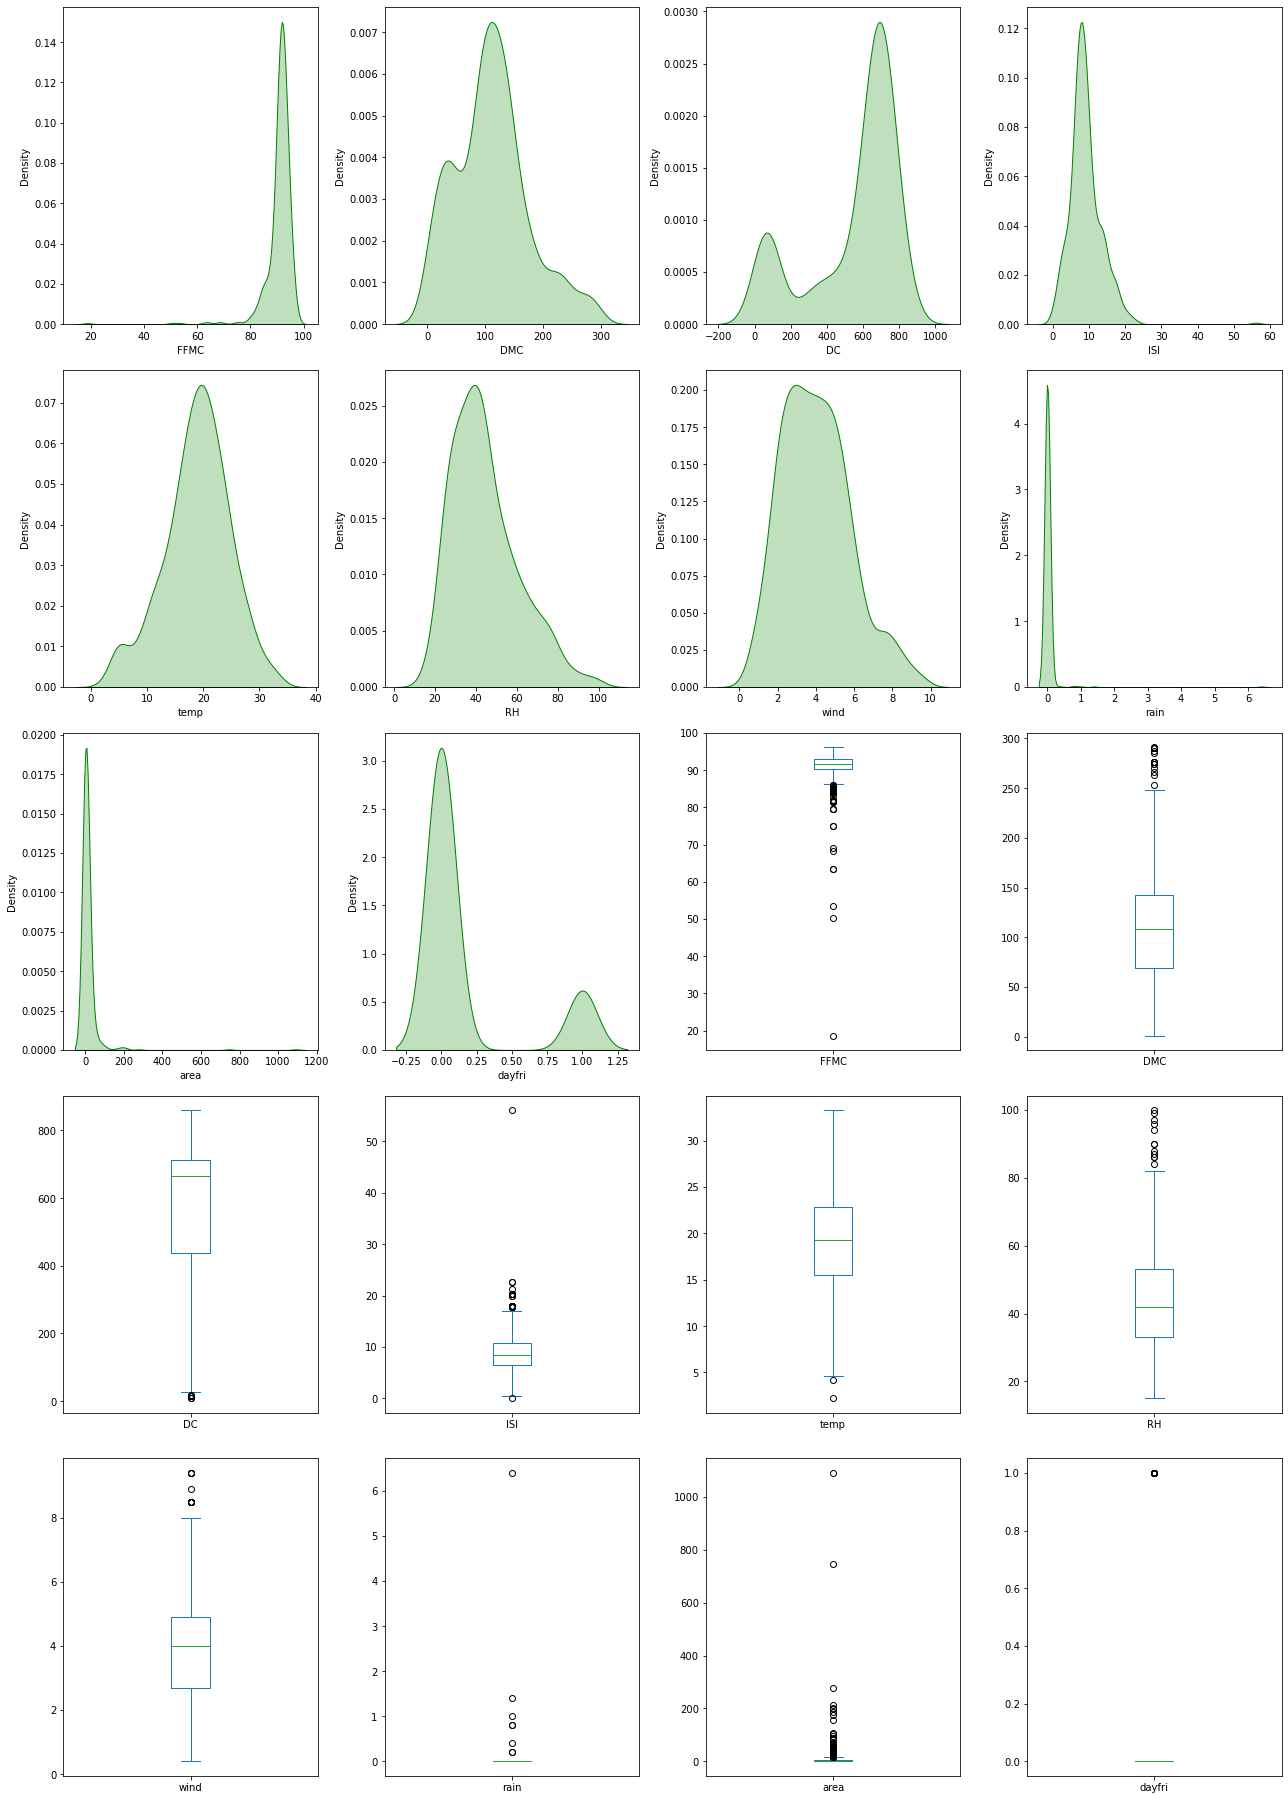

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934,1.816105
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721,1.303265


In [101]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [102]:
#Finding Correlation

<AxesSubplot:>

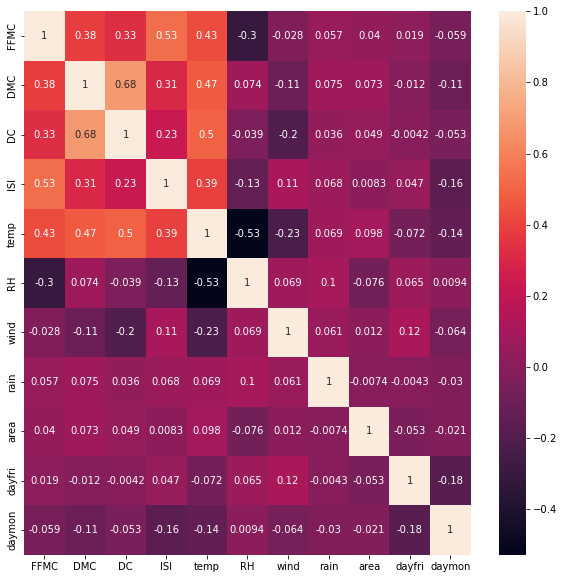

In [103]:
corr = df1[df1.columns[0:11]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

### Neural Network Model

In [104]:
mapping = {'small': 1, 'large': 2}
df1 = df1.replace(mapping)

In [105]:
X = np.array(df1.iloc[:,0:28])
y = np.array(df1.iloc[:,28])

In [106]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [107]:
X_norm=norm_func(X)

In [108]:
x_train,x_test,y_train,y_test= train_test_split(X_norm,y, test_size=0.2,stratify = y)

In [109]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [110]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [111]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
42/42 [==============================] - 1s 2ms/step - loss: 0.6568 - accuracy: 0.5254
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.7312
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.7312
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.7312
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: -0.2428 - accuracy: 0.7312
Epoch 6/150
42/42 [==============================] - 0s 918us/step - loss: -0.5705 - accuracy: 0.7312
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: -0.9019 - accuracy: 0.7312
Epoch 8/150
42/42 [==============================] - 0s 2ms/step - loss: -1.2812 - accuracy: 0.7312
Epoch 9/150
42/42 [==============================] - 0s 2ms/step - loss: -1.7351 - accuracy: 0.7312
Epoch 10/150
42/42 [==============================] - 0s 2ms/step - loss: -2.3019 - accuracy: 0.7312
E

In [112]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 2ms/step - loss: -4745.2974 - accuracy: 0.7312
Accuracy: 73.12


### 4 - Conclusion

In [113]:
import warnings
warnings.filterwarnings('ignore')
predictions = model.predict_generator(x_train)

In [114]:
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))


[86.2, 26.2, 94.3, 5.1, 8.2, 51.0, 6.7, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
[90.6, 35.4, 669.1, 6.7, 18.0, 33.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] => 1 (expected 1)
[90.6, 43.7, 686.9, 6.7, 14.6, 33.0, 1.3, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] => 1 (expected 1)
[91.7, 33.3, 77.5, 9.0, 8.3, 97.0, 4.0, 0.2, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
[89.3, 51.3, 102.2, 9.6, 11.4, 99.0, 1.8, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)


# 2) he dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [77]:
pip install numpy opencv-python pillow tensorflow keras imutils scikit-learn matplotlib

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=c57dfcfb0a3250a65d41effa648db576b593918d007671d746bee8c9752d39c5
  Stored in directory: c:\users\vikrant\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from keras import backend
from sklearn.metrics import r2_score

In [66]:
df2=pd.read_csv("D:\\gas_turbines.csv")

In [67]:
df3=df2.copy()
df3

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [68]:
df3.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [69]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [70]:
num_columns = df3.select_dtypes(exclude='object').columns.tolist()

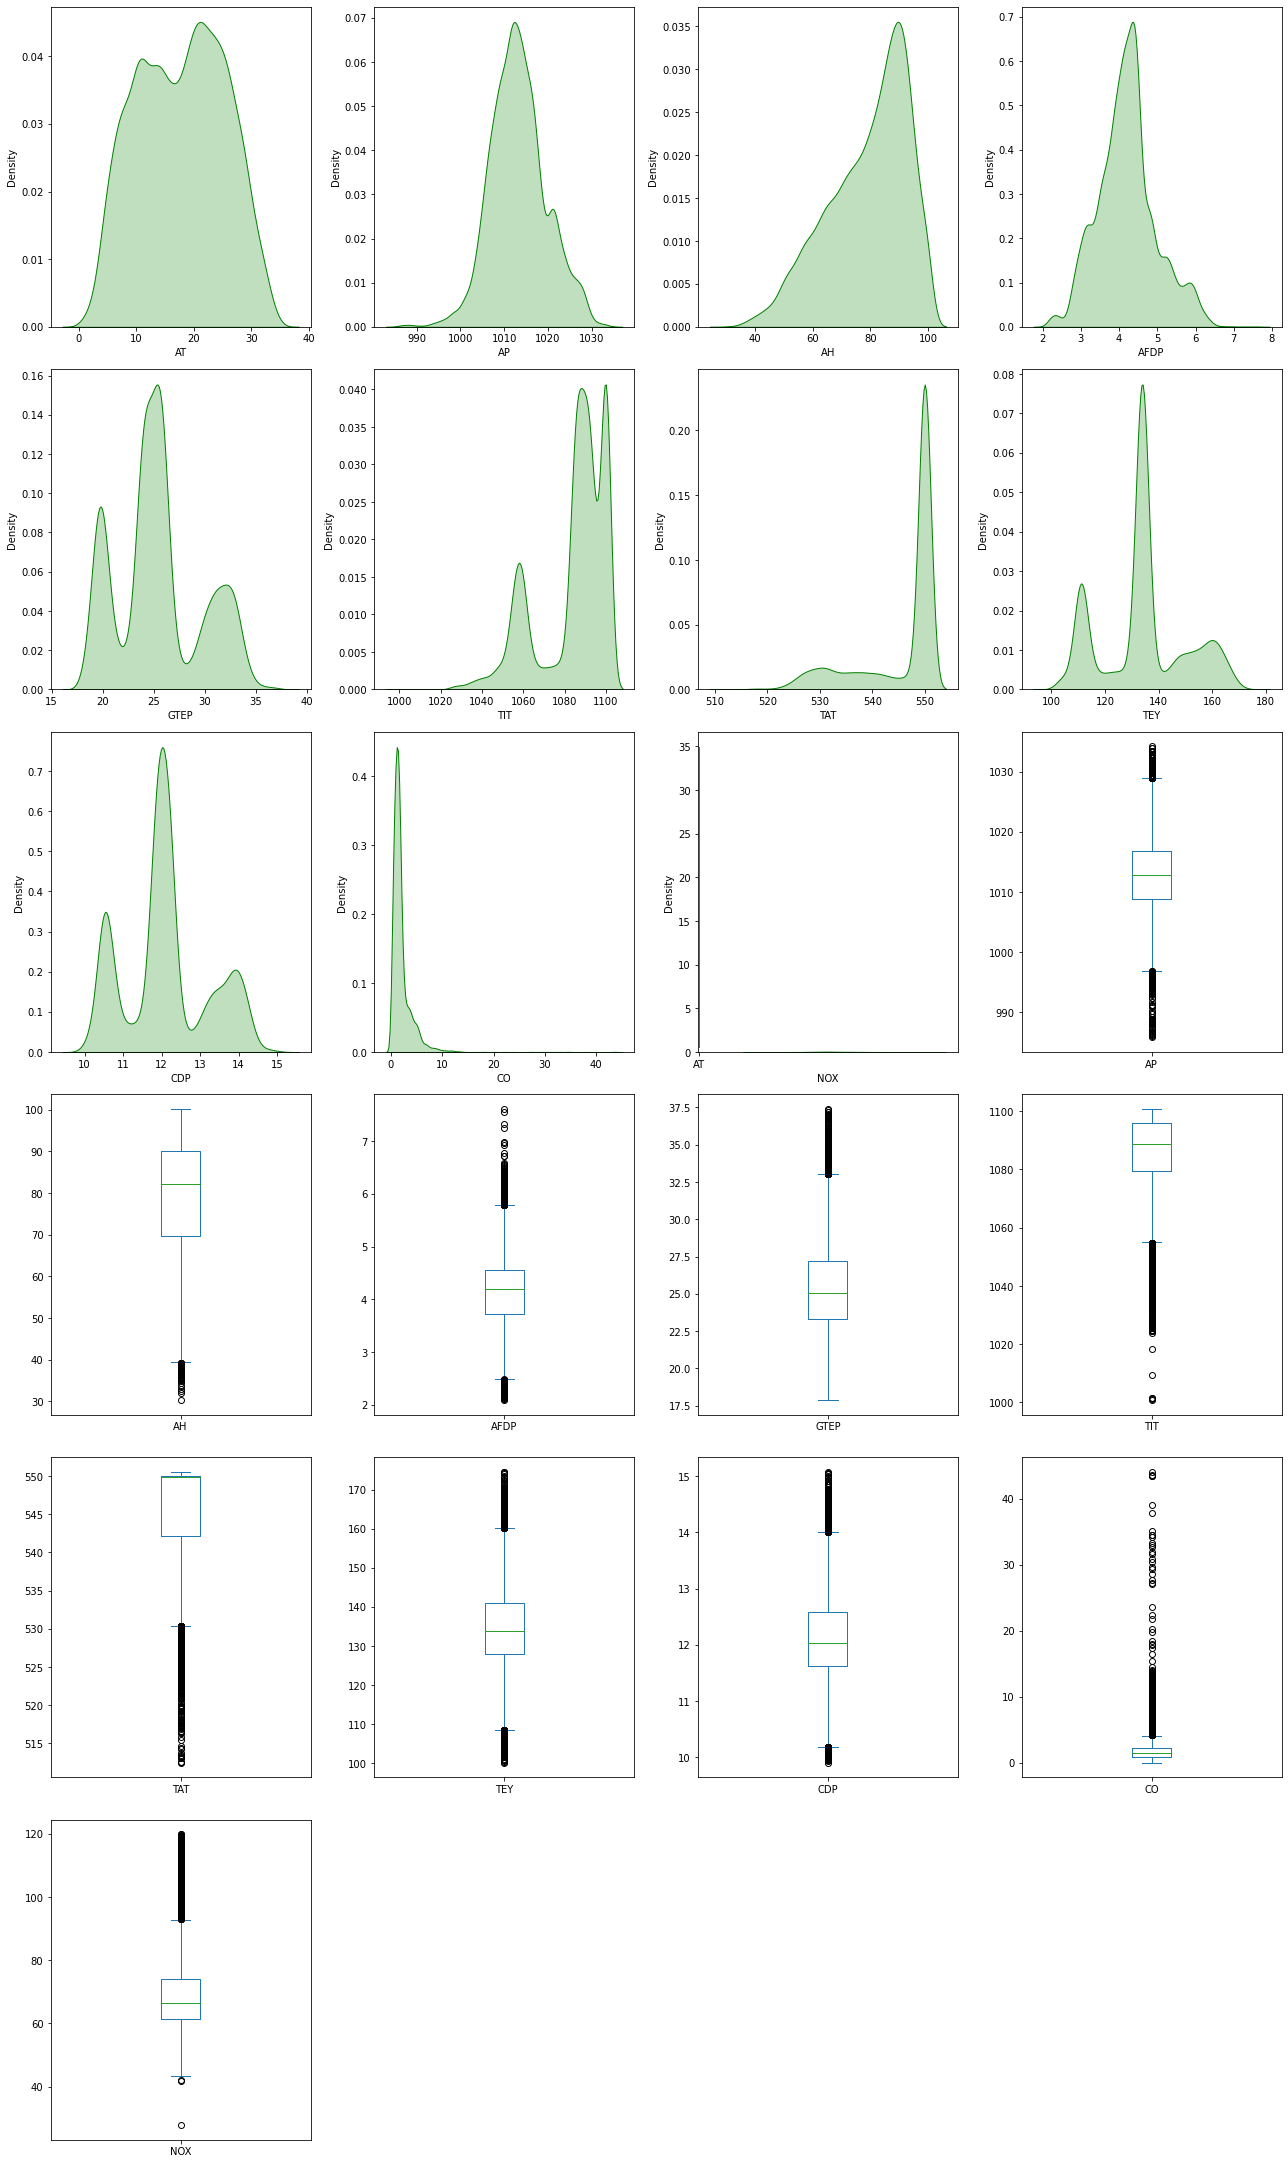

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577,1.126605
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116,2.660381


In [71]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df3[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df3[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df3[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [72]:
#Finding Correlation

<AxesSubplot:>

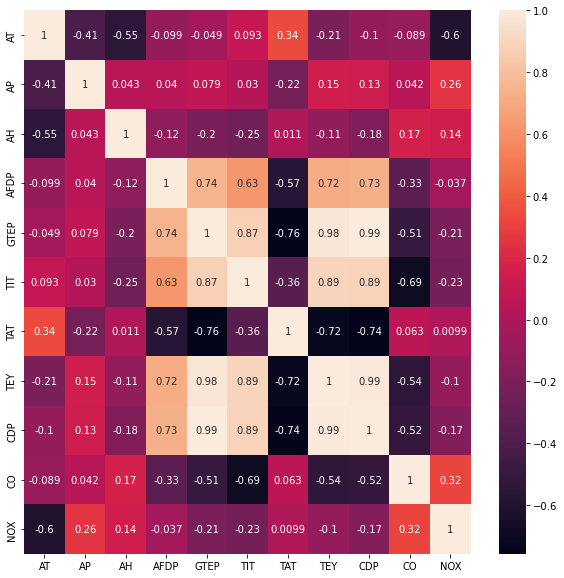

In [73]:
corr = df3.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [74]:
X1 = df3.drop(labels="TEY",axis=1)
y1 = df3["TEY"]

In [75]:
x_train,x_test,y_train,y_test= train_test_split(X1,y1, test_size=0.3)

In [76]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [77]:
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [78]:
model1=Sequential()

In [79]:
model1.add(Dense(7, input_dim=11, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [80]:
from tensorflow.keras.optimizers import Adam

In [81]:
opt = Adam(lr=0.0015)

C:\Users\Vikrant\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [82]:
model1.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])


In [83]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 7)                 84        
                                                                 
 dense_10 (Dense)            (None, 8)                 64        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [115]:
_, accuracy1 = model1.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy1*100))

13/13 [==============================] - 0s 2ms/step - loss: -4745.2974 - accuracy: 0.7312
Accuracy: 73.12
